Obtenga la base IRIS del paquete datasets de la librería sklearn, para
realizar un análisis de SVM.
1. Obtenga un resumen estadístico de los datos, además de sus
distribuciones gráficas.
2. Separe la base de train/test en 90/10
3. Ajuste un SVM con los siguientes kernel:
a. "linear"
b. "rbf"
c. "poly"
4. Entregue el gráfico de cada uno de los modelos para los diferentes
kernel.

In [1]:
#importaciones y ajuste inicial
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


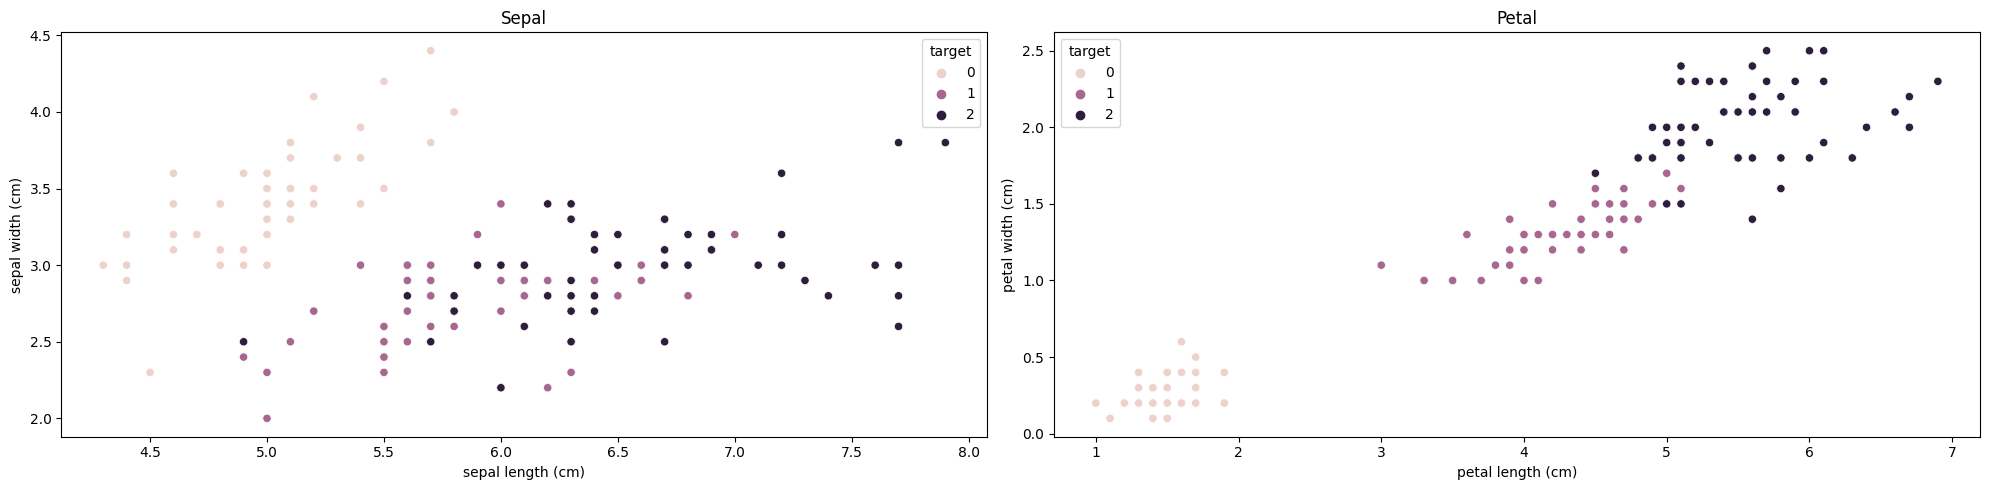

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y="sepal width (cm)", hue='target', ax=axes[0])
axes[0].set_title('Sepal')
sns.scatterplot(data=iris_df, x='petal length (cm)', y="petal width (cm)", hue='target', ax=axes[1])
axes[1].set_title('Petal')

plt.tight_layout()
plt.show()

In [3]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [4]:
#preparamos los datos para el analisis
X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135, 2) (135,)
Test set: (15, 2) (15,)


In [5]:
#hacemos fit a los modelos
C = 1
svc = svm.SVC(kernel='linear', C=1).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [6]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [7]:
titles = ['SVC con kernel linear',
          'SVC con kernel RBF',
          'SVC con kernel polinomial']

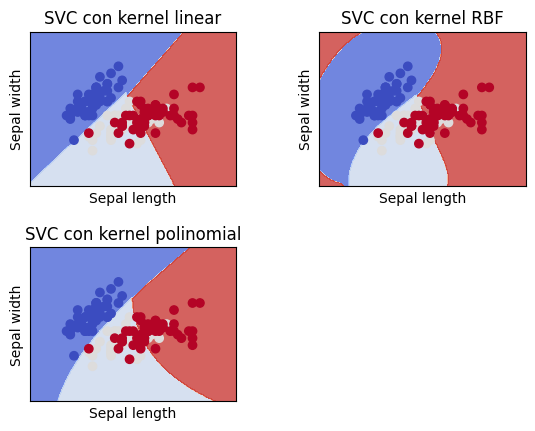

In [8]:
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [9]:
#funcion de matriz de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizada")
    else:
        print('Sin normalizacion')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicho')

In [10]:
y_hat_linear = svc.predict(X_test)
y_hat_rbf = rbf_svc.predict(X_test)
y_hat_poly = poly_svc.predict(X_test)

Linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.60      1.00      0.75         3
           2       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.87      0.89      0.85        15
weighted avg       0.92      0.87      0.87        15

Sin normalizacion
[[6 0 0]
 [0 3 0]
 [0 2 4]]
RBF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15

Sin normalizacion
[[6 0 0]
 [0 3 0]
 [0 1 5]]
Poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.

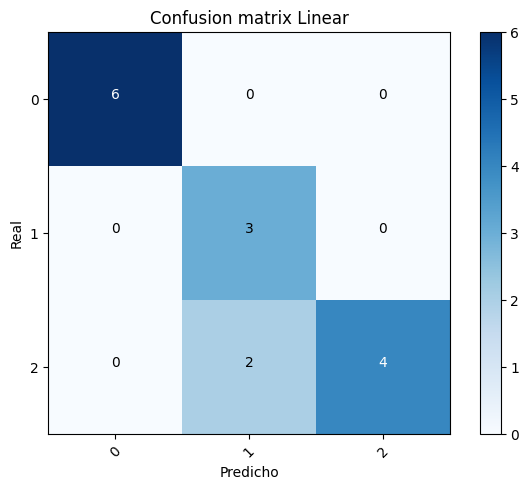

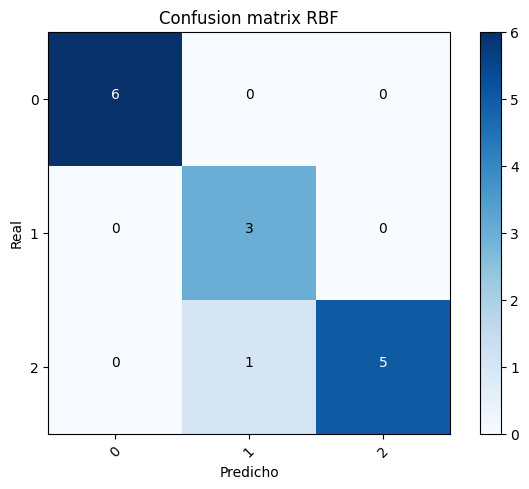

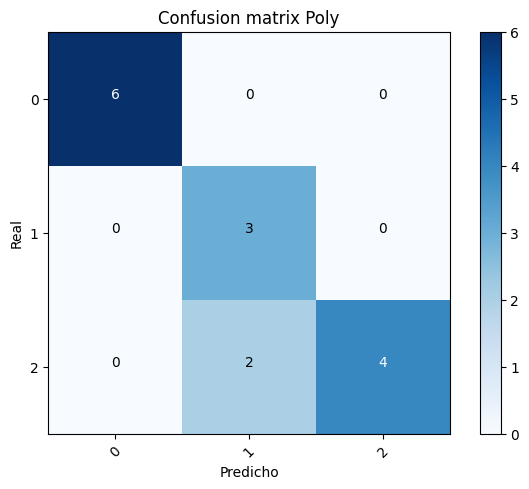

In [17]:
#Matrices de Confusion

for i in [(y_hat_linear, 'Linear'), (y_hat_rbf, 'RBF'), (y_hat_poly, 'Poly')]:
    print(i[1])
    cnf_matrix = confusion_matrix(y_test, i[0], labels=[0,1,2])
    np.set_printoptions(precision=2)
    print (classification_report(y_test, i[0]))

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2'],normalize= False,  title=f'Confusion matrix {i[1]}')